# BÀI TẬP LỚN CUỐI KỲ HK1_2023_503044_Nhập môn Học máy_N01
### Các thành viên trong nhóm
#### NGUYỄN BÁ THÀNH – 52000717
#### HOÀNG ĐỨC MINH – 52100912
#### NGUYỄN TẤN THÀNH – 52100841

# Hiểu rõ về bộ dữ liệu (Online Payments Fraud Detection Dataset)
Thanh toán trực tuyến là phương thức giao dịch phổ biến nhất trên thế giới hiện nay. Tuy nhiên, cùng với sự gia tăng thanh toán trực tuyến cũng kéo theo sự gia tăng gian lận thanh toán. Mục tiêu của cuốn sổ tay này là đào tạo các mô hình học máy để xác định các khoản thanh toán gian lận và không gian lận. Tập dữ liệu được thu thập từ Kaggle, chứa thông tin lịch sử về các giao dịch gian lận có thể được sử dụng để phát hiện gian lận trong thanh toán trực tuyến.
Bộ dữ liệu lớn về thanh toán trực tuyến dành cho mục đích lập mô hình, thử nghiệm và gỡ lỗi phát hiện gian lận.Bộ dữ liệu chứa thông tin về các giao dịch trực tuyến và các đặc điểm của chúng. Mỗi giao dịch được biểu diễn bằng một dòng trong bộ dữ liệu, với các thuộc tính sau:
Các trường

step:
Định nghĩa: Đại diện cho một đơn vị thời gian trong thế giới thực, mỗi bước tương ứng với một giờ.
Ngữ cảnh: Mô phỏng kéo dài trong 30 ngày, tổng cộng có 744 bước.

type:
Định nghĩa: Chỉ loại giao dịch và có thể nhận giá trị như CASH-IN, CASH-OUT, DEBIT, PAYMENT và TRANSFER.
Ngữ cảnh: Mô tả bản chất của hoạt động tài chính được thực hiện trong mỗi giao dịch.

amount:
Định nghĩa: Biểu thị giá trị tiền tệ của giao dịch.
Ngữ cảnh: Đại diện cho số tiền liên quan đến mỗi hoạt động tài chính.

nameOrg:
Định danh: Xác định khách hàng khởi tạo giao dịch.
Ngữ cảnh: Liên kết mỗi giao dịch với người giữ tài khoản chịu trách nhiệm cho sự khởi đầu của nó.

oldbalanceOrg:
Định nghĩa: Phản ánh số dư tài khoản ban đầu của khách hàng trước giao dịch.
Ngữ cảnh: Cung cấp vị trí tài chính ban đầu của người giữ tài khoản.

newbalanceOrg:
Định nghĩa: Chỉ số số dư mới của tài khoản của khách hàng sau giao dịch.
Ngữ cảnh: Ghi lại tình trạng tài chính đã được cập nhật của người giữ tài khoản sau giao dịch.

nameDest:
Định danh: Xác định khách hàng nhận giao dịch.
Ngữ cảnh: Liên kết các giao dịch với tài khoản mà số tiền đang được chuyển đến.

oldbalanceDest:
Định nghĩa: Biểu thị số dư tài khoản ban đầu của người nhận trước giao dịch. Không có thông tin cho các khách hàng bắt đầu bằng M (Thương nhân).
Ngữ cảnh: Cung cấp cái nhìn về vị trí tài chính ban đầu của tài khoản nhận.

newbalanceDest:
Định nghĩa: Biểu thị số dư tài khoản mới của người nhận sau giao dịch. Không có thông tin cho các khách hàng bắt đầu bằng M (Thương nhân).
Ngữ cảnh: Ghi lại tình trạng tài chính đã được cập nhật của tài khoản nhận sau giao dịch.

isFraud:
Định nghĩa: Chỉ số nhị phân (0 hoặc 1) đánh dấu xem giao dịch có gian lận (1) hay không (0).
Ngữ cảnh: Xác định các giao dịch liên quan đến hành vi gian lận trong mô phỏng.

# import các thư viện cần thiết để xử lý bài toán

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf

# Exploratory Data Analysis

In [34]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
data.shape
data.info(show_counts=True)
df = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165439 entries, 0 to 165438
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            165439 non-null  int64  
 1   type            165439 non-null  object 
 2   amount          165439 non-null  float64
 3   nameOrig        165439 non-null  object 
 4   oldbalanceOrg   165439 non-null  float64
 5   newbalanceOrig  165439 non-null  float64
 6   nameDest        165439 non-null  object 
 7   oldbalanceDest  165438 non-null  float64
 8   newbalanceDest  165438 non-null  float64
 9   isFraud         165438 non-null  float64
 10  isFlaggedFraud  165438 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 13.9+ MB


In [35]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
47557,9,CASH_OUT,76432.74,C2029427552,0.00,0.00,C1818633252,179235.77,39513.85,0.0,0.0
88348,10,CASH_OUT,112307.55,C320257214,0.00,0.00,C1546467177,213976.03,326283.59,0.0,0.0
10910,7,PAYMENT,1609.73,C793935829,1996.00,386.27,M158086875,0.00,0.00,0.0,0.0
137585,11,PAYMENT,41726.42,C821099507,99367.00,57640.58,M2128134849,0.00,0.00,0.0,0.0
130277,11,CASH_OUT,403834.09,C248650032,0.00,0.00,C1200245153,1076691.95,1767587.32,0.0,0.0
148621,12,CASH_OUT,150132.64,C776756934,0.00,0.00,C471381554,188678.96,338811.59,0.0,0.0
88911,10,CASH_OUT,426569.49,C1338938318,59844.00,0.00,C1584119395,3276082.09,3702651.59,0.0,0.0
25750,8,CASH_IN,63111.40,C432019927,2386656.07,2449767.47,C68113386,12158541.28,12099108.35,0.0,0.0
26200,8,CASH_OUT,175887.34,C670170167,0.00,0.00,C909295153,11429539.63,10946293.06,0.0,0.0
110164,11,PAYMENT,37425.63,C153726594,146681.88,109256.25,M1676216524,0.00,0.00,0.0,0.0


In [36]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
165434,12,PAYMENT,4149.07,C2001802076,0.0,0.00,M1708280162,0.0,0.0,0.0,0.0
165435,12,PAYMENT,20934.94,C150264052,0.0,0.00,M806755072,0.0,0.0,0.0,0.0
165436,12,CASH_OUT,122832.41,C1327637933,23958.0,0.00,C475670359,11507.0,0.0,0.0,0.0
165437,12,CASH_IN,424626.95,C944569458,58972.0,483598.95,C929611695,0.0,0.0,0.0,0.0
165438,12,PAYMENT,35864.56,C382841079,63909.0,28044.44,M,NaN,NaN,NaN,NaN


In [37]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [38]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [39]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [40]:
df = df.dropna()
data = df

Không có giá trị thiếu trong bộ dữ liệu. Mỗi cột có số lượng bằng không khi được kiểm tra về sự hiện diện của giá trị null hoặc thiếu, cho thấy bộ dữ liệu là đầy đủ và không cần thêm vào bất kỳ thuộc tính nào. Sự thiếu hụt giá trị này là quan trọng để đảm bảo tính đáng tin cậy và đầy đủ của bộ dữ liệu trong các phân tích tiếp theo.

In [41]:
df.duplicated().sum()

# Nếu có duplicate thì thực hiện
# df.drop_duplicates()

0

Bộ dữ liệu không có giá trị trùng lặp. Số lượng hàng trùng lặp, được đánh giá bằng cách sử dụng hàm duplicated(), là không. Sự thiếu hụt giá trị trùng lặp này đóng vai trò quan trọng trong việc duy trì tính toàn vẹn và đáng tin cậy của bộ dữ liệu, đảm bảo rằng mỗi bản ghi giao dịch là duy nhất và ngăn chặn bất kỳ biến dạng tiềm ẩn nào trong phân tích do thông tin dư thừa.

In [42]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)
df.describe()

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |        0.32 |       1e+07 |
|  1 | oldbalanceOrg  |           0 | 3.89394e+07 |
|  2 | newbalanceOrig |           0 | 3.89462e+07 |
|  3 | oldbalanceDest |           0 | 3.89462e+07 |
|  4 | isFraud        |           0 |           1 |


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,165438.000000,1.654380e+05,1.654380e+05,1.654380e+05,1.654380e+05,1.654380e+05,165438.000000,165438.0
mean,9.553700,1.793505e+05,8.862452e+05,9.031801e+05,9.229948e+05,1.185652e+06,0.000804,0.0
std,1.967743,3.360327e+05,2.812184e+06,2.848997e+06,2.380862e+06,2.690358e+06,0.028342,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.141016e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.376580e+04,1.951100e+04,0.000000e+00,3.956590e+04,1.070278e+05,0.000000,0.0
75%,11.000000,2.248485e+05,1.901123e+05,2.227973e+05,7.106599e+05,1.144234e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.894623e+07,3.904248e+07,1.000000,0.0


In [43]:
print(df.type.value_counts())
print(df['isFraud'].value_counts())

PAYMENT     62237
CASH_OUT    54182
CASH_IN     33762
TRANSFER    13779
DEBIT        1478
Name: type, dtype: int64
0.0    165305
1.0       133
Name: isFraud, dtype: int64


#  TRỰC QUAN HÓA DỮ LIỆU ĐƠN BIẾN

# label distribution

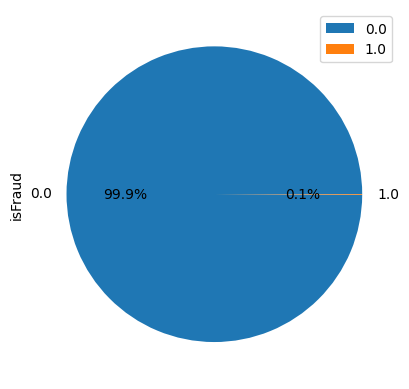

0.0    165305
1.0       133
Name: isFraud, dtype: int64


In [44]:
df['isFraud'].value_counts().plot(kind='pie', legend=df['isFraud'].value_counts, autopct='%1.1f%%', )
plt.show()
print(df['isFraud'].value_counts())

In [45]:
fraud_per = (133/165438)*100
nofraud_per = (165305/165438)*100

print(f"""Chúng ta có thể thấy rằng tập dữ liệu này rất mất cân bằng với giao dịch gian lận chỉ là {fraud_per:.1f}% và
    giao dịch không gian lận {nofraud_per:.1f}%, Điều này là điều dễ hiểu đối với loại tập dữ liệu như này vì không có
    cách nào phần lớn giao dịch của chúng ta sẽ là gian lận trừ khi có lỗi xảy ra với hệ thống.""")


Chúng ta có thể thấy rằng tập dữ liệu này rất mất cân bằng với giao dịch gian lận chỉ là 0.1% và
    giao dịch không gian lận 99.9%, Điều này là điều dễ hiểu đối với loại tập dữ liệu như này vì không có
    cách nào phần lớn giao dịch của chúng ta sẽ là gian lận trừ khi có lỗi xảy ra với hệ thống.


Text(0, 0.5, 'Số lượng gia dịch')

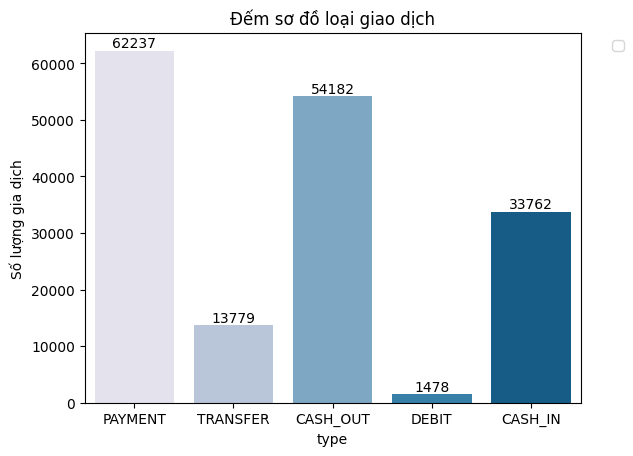

In [46]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Đếm sơ đồ loại giao dịch')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel("Số lượng gia dịch")

CASH_OUT là loại giao dịch có nhiều loại nhất, tiếp theo là các loại payment, cash in, transfer and debit types.

In [47]:
df['nameOrig'].value_counts()

C260230637     2
C44568807      2
C1709295811    2
C1401476314    1
C2101784008    1
              ..
C1875419947    1
C376344339     1
C1154774968    1
C1134280576    1
C944569458     1
Name: nameOrig, Length: 165435, dtype: int64

Có tổng cộng 165435 khách hàng ban đầu

Text(0.5, 1.0, 'Distribution of transaction amount')

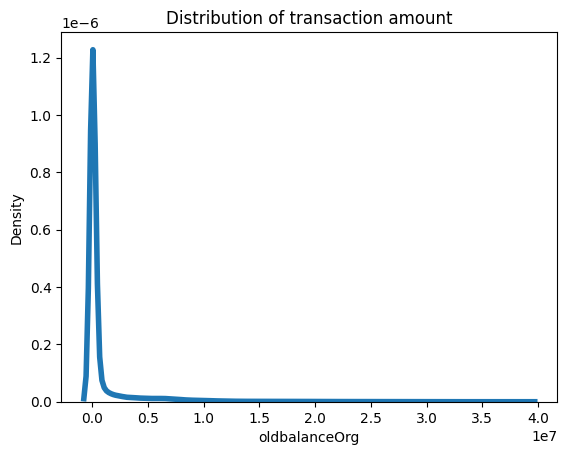

In [48]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

Sự phân bổ số dư sau giao dịch của khách hàng ban đầu bị lệch phải.

Text(0.5, 1.0, 'Distribution of transaction amount')

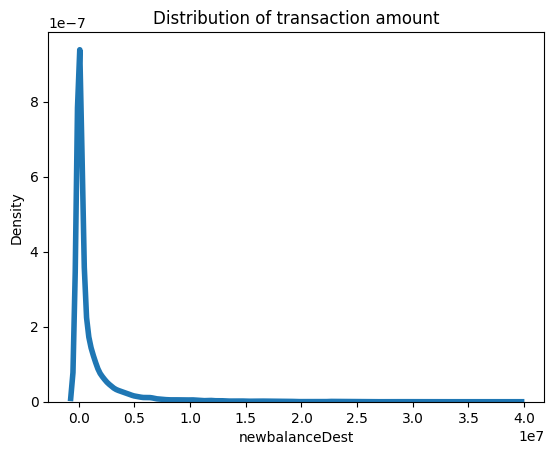

In [49]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

Sự phân bổ số dư sau giao dịch của người nhận bị lệch phải.

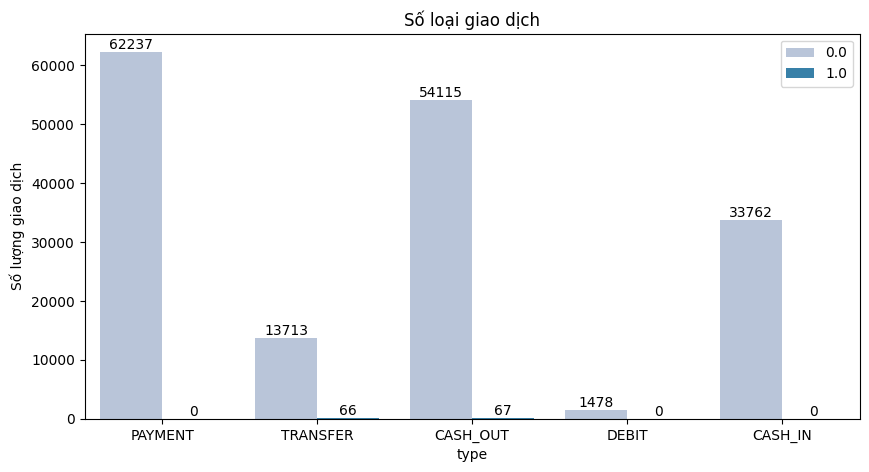

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot 1: Count plot of transaction type
sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Số loại giao dịch')
ax.legend(loc='best')
ax.set_ylabel('Số lượng giao dịch')

plt.show()


Giao dịch gian lận chỉ xảy ra ở hình thức ghi nợ và chuyển khoản.

9     37628
11    37241
10    35991
8     21097
12    19480
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: step, dtype: int64


Text(0.5, 1.0, 'Distribution_of_Transaction_Step')

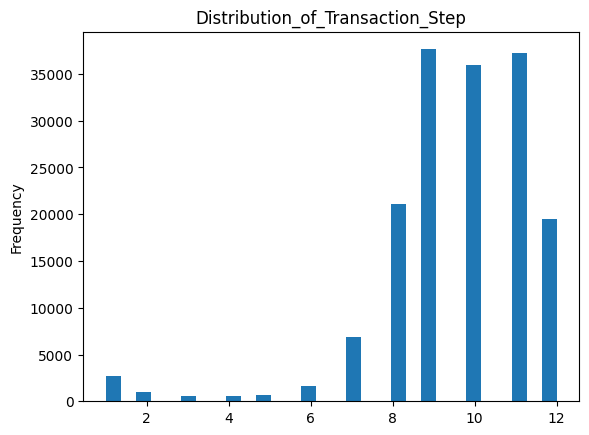

In [51]:
print(df['step'].value_counts())
df['step'].plot.hist(bins=30)
plt.title('Distribution_of_Transaction_Step')

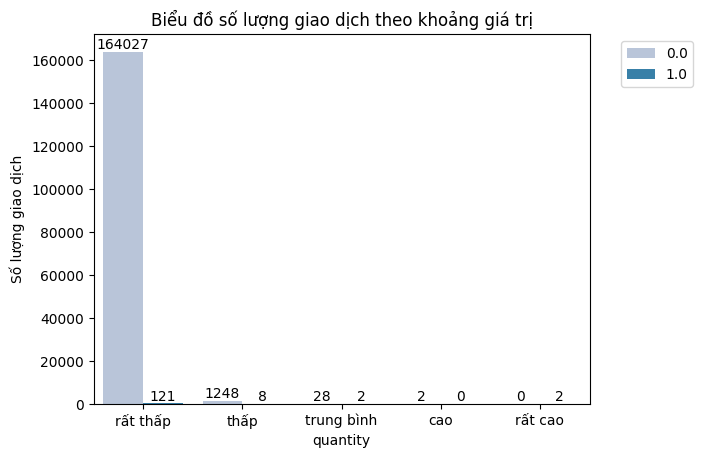

In [52]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['rất thấp', 'thấp', 'trung bình', 'cao', 'rất cao'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Biểu đồ số lượng giao dịch theo khoảng giá trị')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Số lượng giao dịch')
plt.show()


- Tất cả các giao dịch gian lận đều thuộc loại có số tiền rất thấp.
- Điều này cho thấy rằng trong hầu hết các trường hợp, các giao dịch nhỏ dễ bị gian lận hơn.

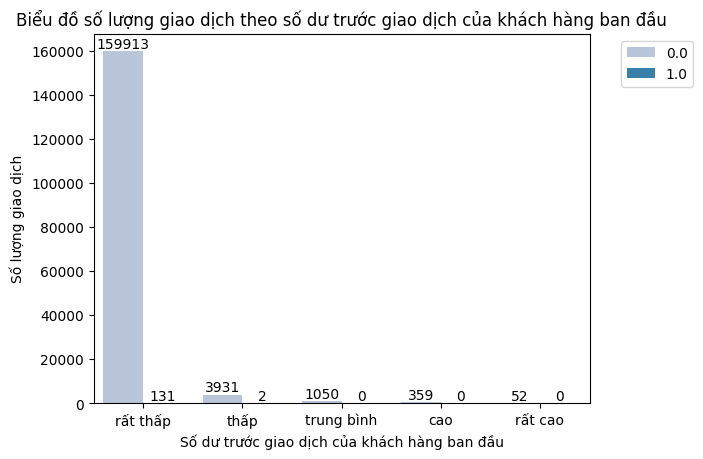

In [53]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['rất thấp', 'thấp', 'trung bình', 'cao', 'rất cao'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Biểu đồ số lượng giao dịch theo số dư trước giao dịch của khách hàng ban đầu')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Số lượng giao dịch')
plt.xlabel('Số dư trước giao dịch của khách hàng ban đầu')
plt.show()


- Khách hàng ban đầu có số dư trước giao dịch rất thấp có số lượng giao dịch gian lận cao nhất.

- Điều này có nghĩa là những khách hàng ban đầu có số dư trước giao dịch rất thấp có thể dễ rơi vào giao dịch gian lận hơn.

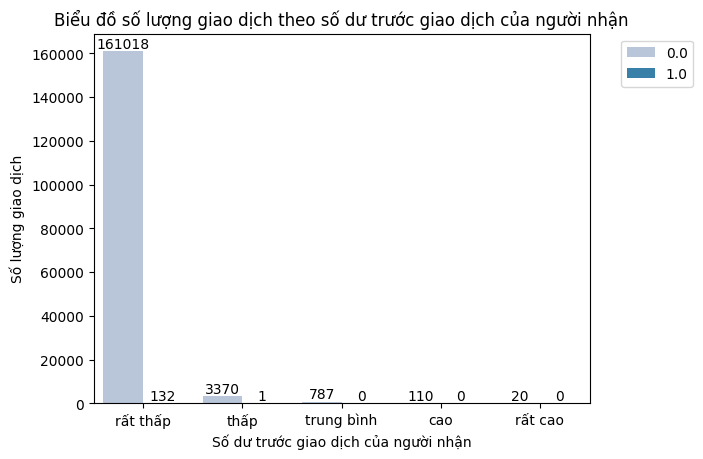

In [54]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['rất thấp', 'thấp', 'trung bình', 'cao', 'rất cao'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Biểu đồ số lượng giao dịch theo số dư trước giao dịch của người nhận')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Số lượng giao dịch')
plt.xlabel('Số dư trước giao dịch của người nhận')
plt.show()


- Người nhận có số dư trước giao dịch rất thấp có số lượng giao dịch gian lận cao nhất.
- Điều này ngụ ý rằng những người nhận có số dư trước giao dịch rất thấp có thể dễ bị giao dịch gian lận hơn.

### Tất cả các tính năng ngoại trừ 'step' đều có phân phối lệch phải.

### Dữ liệu bị lệch - Khi phân phối bị lệch, điều đó có nghĩa là dữ liệu được phân phối không đối xứng và cho biết sự hiện diện của các giá trị ngoại lệ.

### ớng của độ lệch cho thấy hướng của các ngoại lệ ở đầu dương hoặc âm.

### Nó có thể được khắc phục bằng cách loại bỏ các ngoại lệ, chuẩn hóa hoặc chuyển đổi dữ liệu bằng cách sử dụng phép biến đổi log, hoặc đa thức.

# OUTLIER

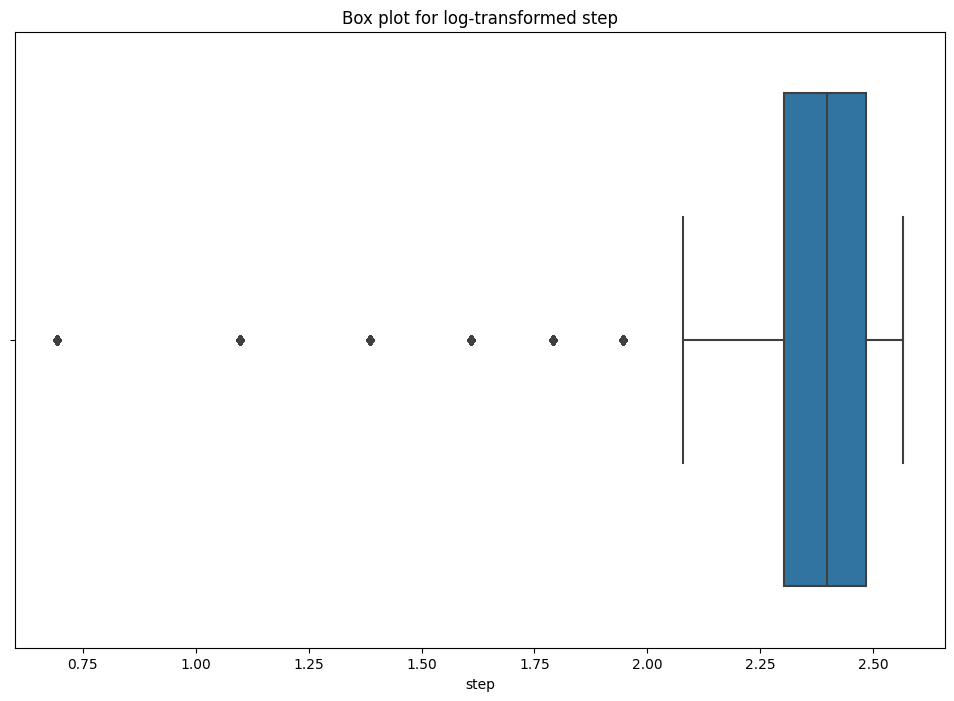

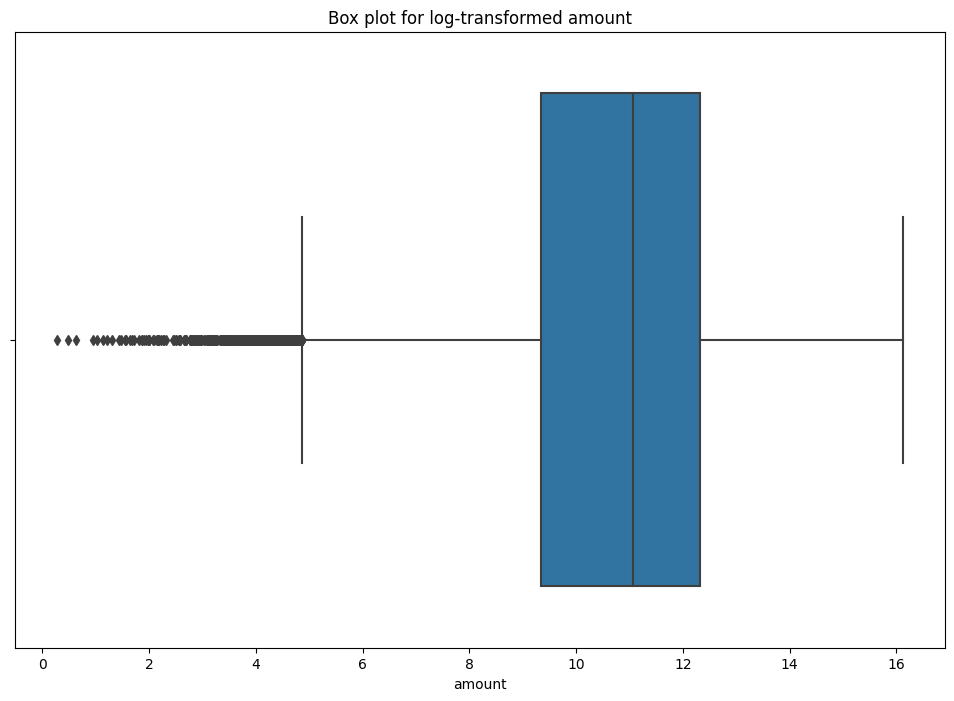

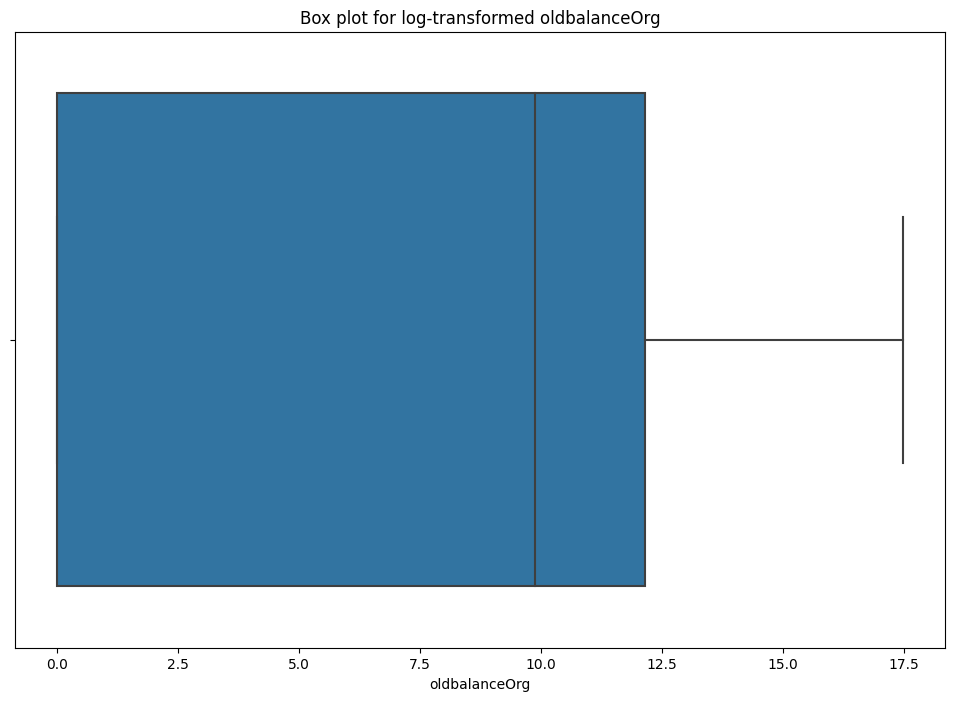

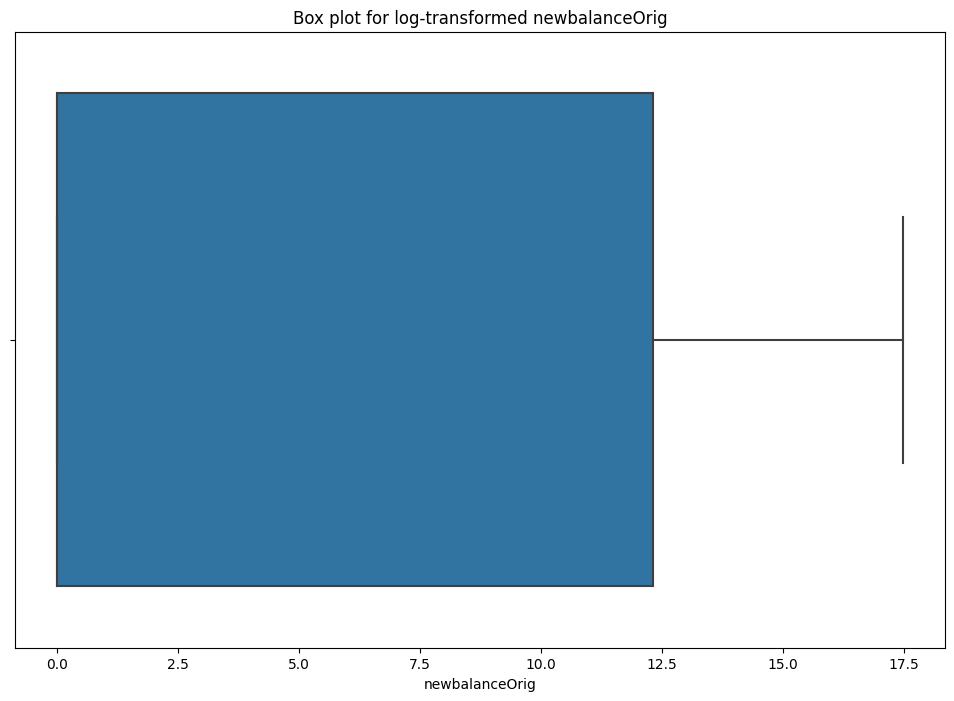

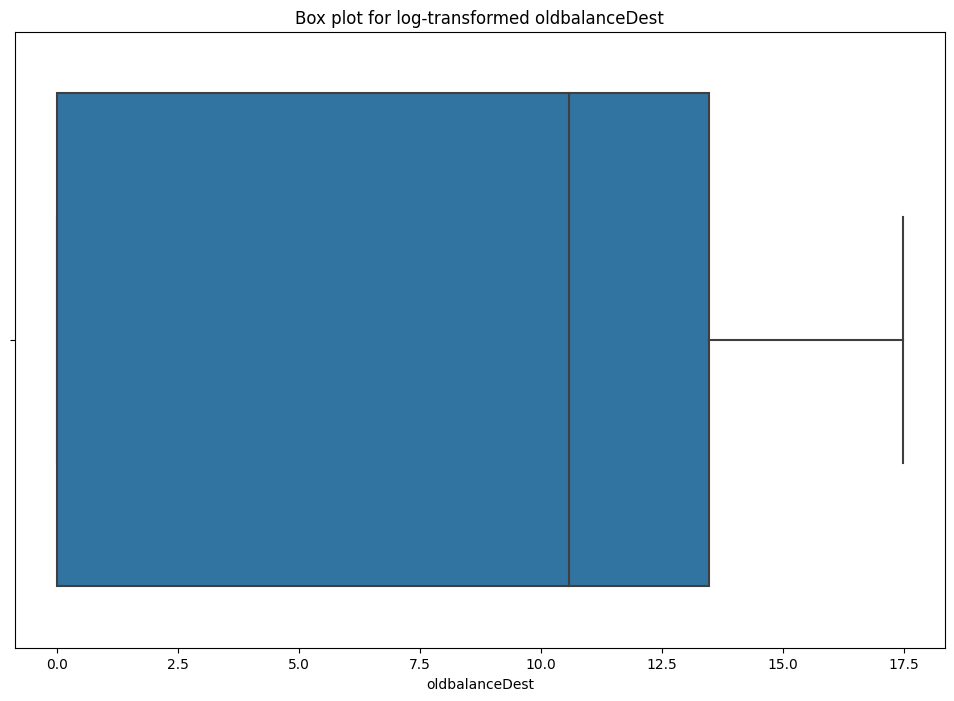

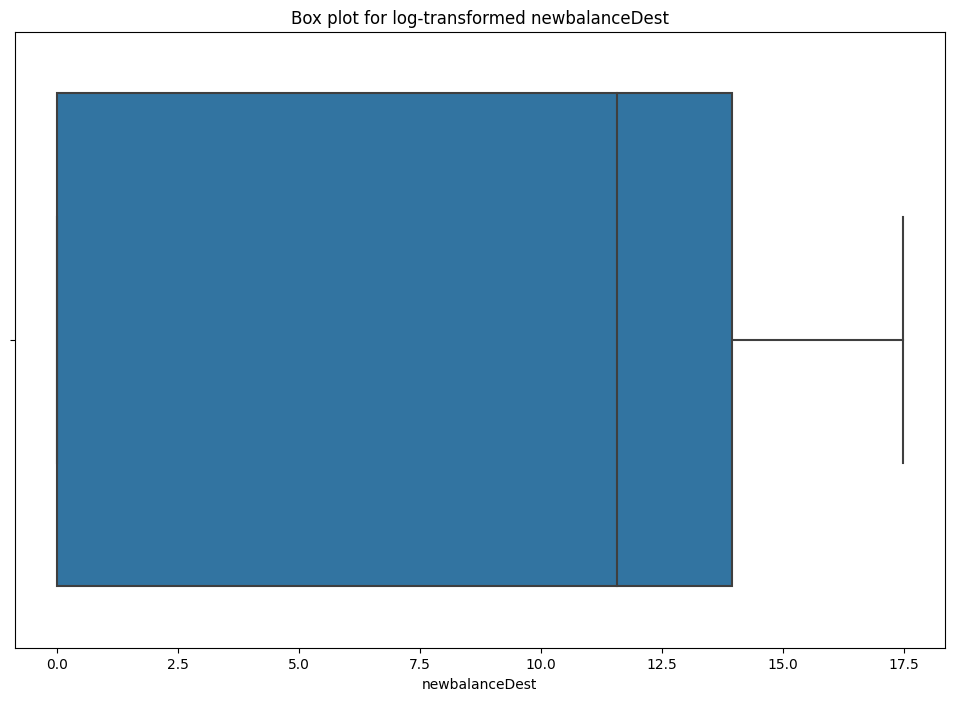

In [55]:
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for column in numeric_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=np.log1p(df[column]))  # Applying log transformation
    plt.title(f'Box plot for log-transformed {column}')
    plt.show()

- Từ hình ảnh trực quan ở trên, chúng ta có thể thấy rằng dữ liệu chứa rất nhiều ngoại lệ và hầu hết dữ liệu bị lệch, đó là lý do tại sao biểu đồ được vẽ chỉ hiển thị một chút nhưng có ngưỡng cao trên trục-y. Những gì chúng ta có thể làm sau này là loại bỏ các giá trị ngoại lệ và sử dụng bộ chia tỷ lệ để xử lý dữ liệu sai lệch.
- vì quá nhiều nên không phải tất cả các ngoại lệ đều bị xóa và nó cũng coi nhãn isFraud và nhãn isFlaggedFraud là ngoại lệ và cũng xóa chúng. Điều này có thể có nghĩa là tất cả các giao dịch gian lận có thể được coi là ngoại lệ.

# TRỰC QUAN HÓA DỮ LIỆU ĐA BIẾN
# ĐỘ TƯƠNG QUAN GIỮA CÁC FEATURE

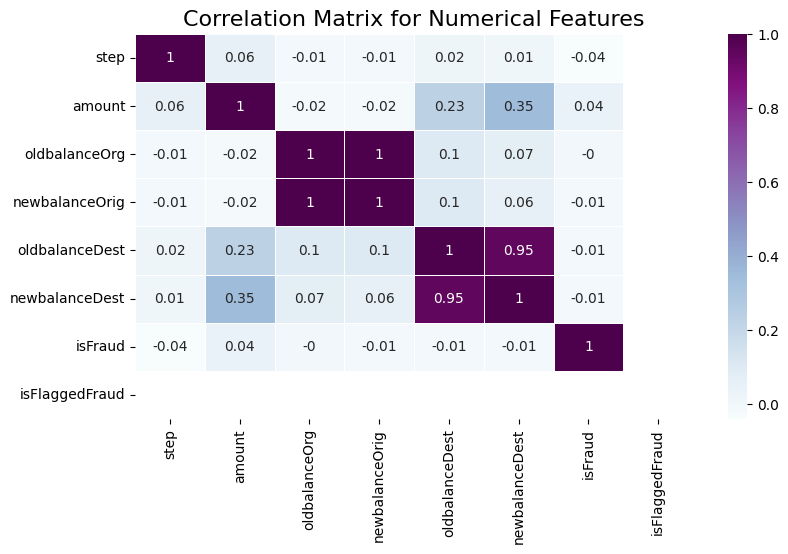

In [56]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features

plt.figure(figsize=(9, 5))
correlation_matrix = df[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='BuPu', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features', size=16)
plt.show()

- Từ ma trận tương quan ở trên, chúng ta có thể thấy rằng nhiều đặc điểm thực sự có ít mối tương quan với nhau hơn. Nhưng có 4 đặc điểm có độ tương quan cao (1), đó là oldBalanceOrd-newBalanceOrg và oldBalanceDest-newBalanceDest. Từ Hiểu biết về dữ liệu trước đó, chúng ta có thể thấy rằng đây là số dư mà người gửi và người nhận có sau khi thực hiện giao dịch. Do mối tương quan cao này, chúng tôi có thể giảm tính năng tổng thể bằng cách thực hiện kỹ thuật tính năng kết hợp sự cân bằng cũ và mới cho điểm đi và điểm đến.
##### Tóm lại
- oldbalanceOrg và newbalanceOrig có mối quan hệ tích cực mạnh mẽ.
- oldbalanceDest và newbalanceDest có mối quan hệ tích cực mạnh mẽ.
- oldbalanceOrg và số lượng có mối quan hệ tích cực yếu.
- newbalanceOrig và số lượng có mối quan hệ tích cực vừa phải.

# Data Preprocessing

# Data Cleaning

In [57]:
dataTemp = data.copy()
# Dropping columns that are not needed
dataTemp.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

dataTemp["type"] = dataTemp["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
dataTemp.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0.0,rất thấp,rất thấp,rất thấp
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0.0,rất thấp,rất thấp,rất thấp
2,1,4,181.00,181.0,0.00,0.0,0.0,1.0,rất thấp,rất thấp,rất thấp
3,1,1,181.00,181.0,0.00,21182.0,0.0,1.0,rất thấp,rất thấp,rất thấp
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0.0,rất thấp,rất thấp,rất thấp


# XỬ LÝ OUTLIER

In [58]:
from scipy.stats import iqr

numeric_columns = ['step','type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for column in numeric_columns:
    column_data = dataTemp[column]
    column_iqr = iqr(column_data)
    print(f"IQR for {column}: {column_iqr}")

IQR for step: 2.0
IQR for type: 2.0
IQR for amount: 213438.305
IQR for oldbalanceOrg: 190112.3025
IQR for newbalanceOrig: 222797.34
IQR for oldbalanceDest: 710659.8975
IQR for newbalanceDest: 1144234.28


Áp dụng Robust Scaling cho các cột số trong numeric_columns. Robust Scaling là một phương pháp chuẩn hóa dữ liệu dựa trên median và IQR, giúp giảm ảnh hưởng của outliers.

In [59]:
from sklearn.preprocessing import  RobustScaler
for column in numeric_columns:
    dataTemp[column] = np.log1p(dataTemp[column])

robust_scaler = RobustScaler()
dataTemp[numeric_columns] = robust_scaler.fit_transform(dataTemp[numeric_columns])
dataTemp

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
0,-9.350228,0.000000,-0.626908,0.178158,0.973263,-0.785645,-0.830154,0.0,rất thấp,rất thấp,rất thấp
1,-9.350228,0.000000,-1.184841,0.007020,0.801711,-0.785645,-0.830154,0.0,rất thấp,rất thấp,rất thấp
2,-9.350228,0.736966,-1.965547,-0.384585,0.000000,-0.785645,-0.830154,1.0,rất thấp,rất thấp,rất thấp
3,-9.350228,-0.584963,-1.965547,-0.384585,0.000000,-0.046370,-0.830154,1.0,rất thấp,rất thấp,rất thấp
4,-9.350228,0.000000,-0.569734,0.062194,0.836865,-0.785645,-0.830154,0.0,rất thấp,rất thấp,rất thấp
...,...,...,...,...,...,...,...,...,...,...,...
165433,0.916261,0.000000,-0.708079,-0.162404,0.000000,-0.785645,-0.830154,0.0,rất thấp,rất thấp,rất thấp
165434,0.916261,0.000000,-0.916556,-0.812709,0.000000,-0.785645,-0.830154,0.0,rất thấp,rất thấp,rất thấp
165435,0.916261,0.000000,-0.373642,-0.812709,0.000000,-0.785645,-0.830154,0.0,rất thấp,rất thấp,rất thấp
165436,0.916261,-0.584963,0.219937,0.016891,0.000000,-0.091655,-0.830154,0.0,rất thấp,rất thấp,rất thấp


In [60]:
X = dataTemp.drop(['isFraud', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'],axis=1)
y = dataTemp['isFraud']
print(X.head(),"\n")
print(y.head())

       step      type    amount  oldbalanceOrg  newbalanceOrig  \
0 -9.350228  0.000000 -0.626908       0.178158        0.973263   
1 -9.350228  0.000000 -1.184841       0.007020        0.801711   
2 -9.350228  0.736966 -1.965547      -0.384585        0.000000   
3 -9.350228 -0.584963 -1.965547      -0.384585        0.000000   
4 -9.350228  0.000000 -0.569734       0.062194        0.836865   

   oldbalanceDest  newbalanceDest  
0       -0.785645       -0.830154  
1       -0.785645       -0.830154  
2       -0.785645       -0.830154  
3       -0.046370       -0.830154  
4       -0.785645       -0.830154   

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64


In [61]:
y[y==1].count()

133

In [62]:
y[y==0].count()

165305

In [63]:
y.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
165433    False
165434    False
165435    False
165436    False
165437    False
Name: isFraud, Length: 165438, dtype: bool

# XỬ LÝ IMBALANCED

- Mục đích của việc sử dụng SMOTE ở đây là tạo thêm các ví dụ tổng hợp về lớp thiểu số (giao dịch gian lận) trong dữ liệu huấn luyện. Điều này giúp mô hình không bị thiên vị về nhóm đa số (giao dịch không lừa đảo) trong quá trình đào tạo, cải thiện khả năng phát hiện các mẫu gian lận.
- Sử dụng SMOTE(Kỹ thuật lấy mẫu quá mức thiểu số tổng hợp)  để cân bằng tập dữ liệu. Số lượng kết quả cho thấy hiện tại chúng tôi có số lượng phiên bản lớp chính xác (1 và 0).

In [64]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res = pd.DataFrame(y_res)
print(y_res.shape)
print(y_res.shape)

(330610, 1)
(330610, 1)


# Feature scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_res)
X_train = scaler.transform(X_res)

# MODEL TRAINNING

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, y_res, test_size = 0.3, random_state = 0)
x_train_SS = x_train
y_train_SS = y_train
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (231427, 7)
Shape of x_test:  (99183, 7)
Shape of y_train:  (231427, 1)
Shape of y_test:  (99183, 1)


### Do có tập dữ liệu lớn, Rừng ngẫu nhiên và Hồi quy logistic với trọng số lớp cân bằng được sử dụng để xác định gian lận thanh toán trực tuyến.

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Logistic Regression

In [68]:
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [69]:
X_train_prediction = model_logistic.predict(x_train)
logistic_new_training_data_accuracy = accuracy_score(X_train_prediction, y_train)
y_test_prediction = model_logistic.predict(x_test)
logistic_new_test_data_accuracy = accuracy_score(y_test_prediction, y_test)

In [70]:
print('Độ chính xác về dữ liệu đào tạo : ', logistic_new_training_data_accuracy)
print('Điểm chính xác trên Dữ liệu thử nghiệm : ', logistic_new_test_data_accuracy)

Độ chính xác về dữ liệu đào tạo :  0.9181685801570257
Điểm chính xác trên Dữ liệu thử nghiệm :  0.916356633697307


In [71]:
confusionMatix = confusion_matrix(y_test,y_test_prediction);
classification_report_ = classification_report(y_test,y_test_prediction)
print(confusionMatix)
print(classification_report_)

[[43394  6539]
 [ 1757 47493]]
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     49933
         1.0       0.88      0.96      0.92     49250

    accuracy                           0.92     99183
   macro avg       0.92      0.92      0.92     99183
weighted avg       0.92      0.92      0.92     99183



<Axes: >

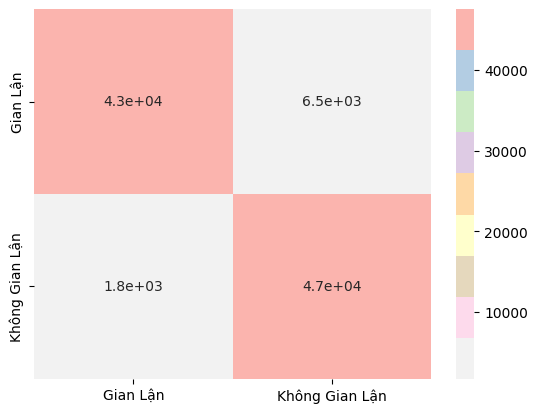

In [72]:
sns.heatmap(confusionMatix, annot=True, cmap='Pastel1_r', xticklabels=['Gian Lận' ,'Không Gian Lận'],yticklabels=['Gian Lận' ,'Không Gian Lận'])

# naive bayes

In [73]:
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [74]:
gnb_new_training = model_NB.score(x_train, y_train)
gnb_new_test = model_NB.score(x_test, y_test)
print("ộ chính xác về dữ liệu đào tạo : ", gnb_new_training)
print("Điểm chính xác trên Dữ liệu thử nghiệm :  ", gnb_new_test)

ộ chính xác về dữ liệu đào tạo :  0.8881159069598621
Điểm chính xác trên Dữ liệu thử nghiệm :   0.8848492181119748


In [75]:
y_pred = model_NB.predict(x_test)
report = classification_report(y_test, y_pred)
gnb_cm_new=confusion_matrix(y_pred, y_test)
print(gnb_cm_new)
print(report)

[[40018  1506]
 [ 9915 47744]]
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.88     49933
         1.0       0.83      0.97      0.89     49250

    accuracy                           0.88     99183
   macro avg       0.90      0.89      0.88     99183
weighted avg       0.90      0.88      0.88     99183



<Axes: >

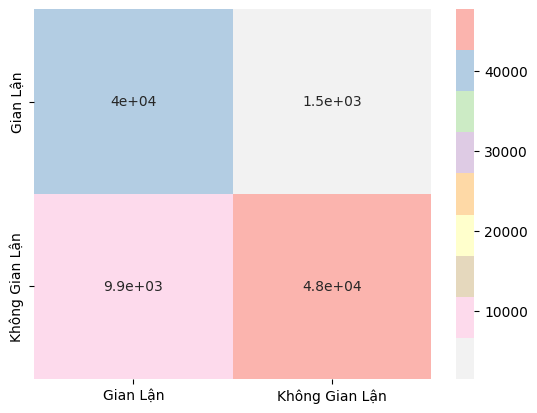

In [76]:
sns.heatmap(gnb_cm_new, annot=True, cmap='Pastel1_r', xticklabels=['Gian Lận' ,'Không Gian Lận'],yticklabels=['Gian Lận' ,'Không Gian Lận'])

# KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ộ chính xác về dữ liệu đào tạo :  0.9983104823551271
Điểm chính xác trên Dữ liệu thử nghiệm :   0.9973584182773257
[[49671     0]
 [  262 49250]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     49933
         1.0       0.99      1.00      1.00     49250

    accuracy                           1.00     99183
   macro avg       1.00      1.00      1.00     99183
weighted avg       1.00      1.00      1.00     99183



<Axes: >

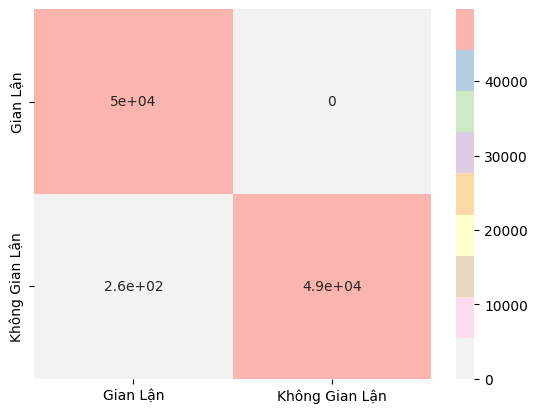

In [77]:
knn = KNeighborsClassifier(n_neighbors=5,p=1)
knn.fit(x_train,y_train)


knn_new_training = knn.score(x_train, y_train)
knn_new_test = knn.score(x_test, y_test)
print("ộ chính xác về dữ liệu đào tạo : ", knn_new_training)
print("Điểm chính xác trên Dữ liệu thử nghiệm :  ", knn_new_test)

y_pred = knn.predict(x_test)

report = classification_report(y_test, y_pred)
knn_cm_new=confusion_matrix(y_pred, y_test)

print(knn_cm_new)
print(report)

sns.heatmap(knn_cm_new, annot=True, cmap='Pastel1_r', xticklabels=['Gian Lận' ,'Không Gian Lận'],yticklabels=['Gian Lận' ,'Không Gian Lận'])

# Decision Tree

ộ chính xác về dữ liệu đào tạo :  1.0
Điểm chính xác trên Dữ liệu thử nghiệm :   0.9988707742254217
[[49853    32]
 [   80 49218]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     49933
         1.0       1.00      1.00      1.00     49250

    accuracy                           1.00     99183
   macro avg       1.00      1.00      1.00     99183
weighted avg       1.00      1.00      1.00     99183



<Axes: >

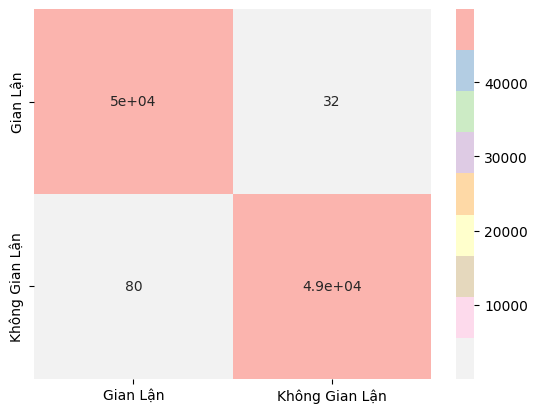

In [78]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)

DT_new_training = model_DT.score(x_train, y_train)
DT_new_test = model_DT.score(x_test, y_test)

print("ộ chính xác về dữ liệu đào tạo : ", DT_new_training)
print("Điểm chính xác trên Dữ liệu thử nghiệm :  ", DT_new_test)

y_pred = model_DT.predict(x_test)

reportdt = classification_report(y_test, y_pred)
dt_cm_new=confusion_matrix(y_pred, y_test)

print(dt_cm_new)
print(reportdt)

sns.heatmap(dt_cm_new, annot=True, cmap='Pastel1_r', xticklabels=['Gian Lận' ,'Không Gian Lận'],yticklabels=['Gian Lận' ,'Không Gian Lận'])

# Random Forest Classifier

<ipython-input-79-160625ba0efd>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train,y_train)
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   14.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


Báo cáo phân loại cho phân loại rừng ngẫu nhiên: 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     49933
         1.0       0.98      0.99      0.99     49250

    accuracy                           0.99     99183
   macro avg       0.99      0.99      0.99     99183
weighted avg       0.99      0.99      0.99     99183

Ma trận nhầm lẫn của phân loại rừng ngẫu nhiên: 
 [[49152   781]
 [  516 48734]]


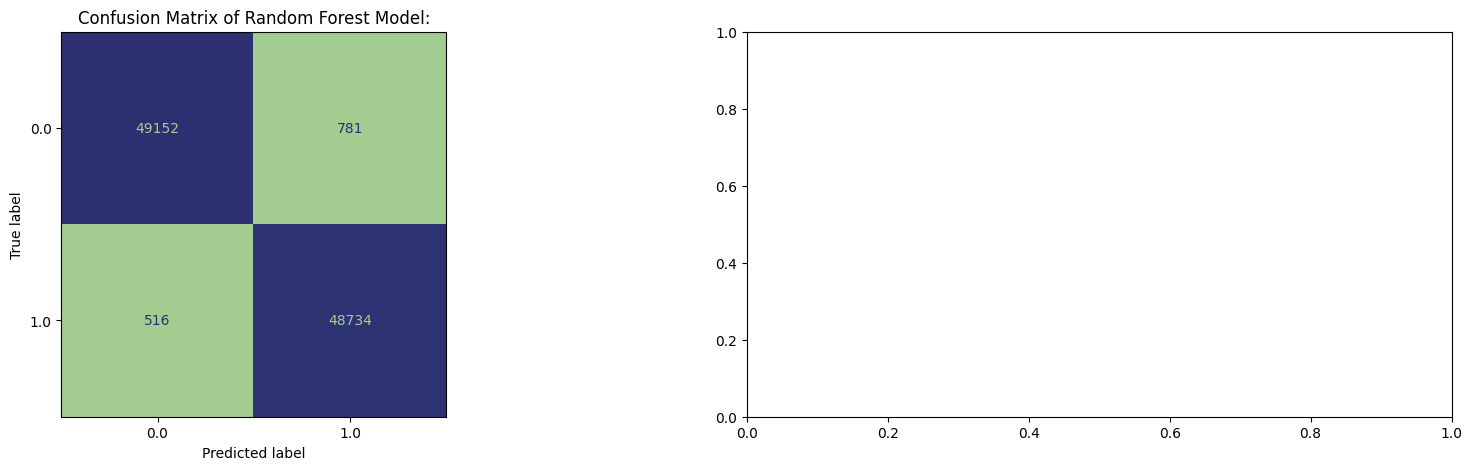

In [79]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

confusion_randomtree = confusion_matrix(y_test,y_pred)
print("Báo cáo phân loại cho phân loại rừng ngẫu nhiên: \n", classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn của phân loại rừng ngẫu nhiên: \n", confusion_randomtree)

fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)


# Modelling using Xg-Boost (eXtreme Gradient Boosting) gradient boosting.

In [80]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model_XGB = XGBClassifier(
    max_depth=6,
    learning_rate=0.05,
    n_estimators=400,
    objective="binary:hinge",
    booster='gbtree',
    scale_pos_weight=1,
    base_score=0.5,
    random_state=42,
    verbosity=1  # Sửa giá trị thành một số nguyên (ví dụ: 0, 1, 2)
)

model_XGB.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:47:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='binary:hinge', ...)

Báo cáo phân loại : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     49933
         1.0       1.00      1.00      1.00     49250

    accuracy                           1.00     99183
   macro avg       1.00      1.00      1.00     99183
weighted avg       1.00      1.00      1.00     99183

Ma trận nhầm lẫn  
 [[49880    53]
 [    8 49242]]


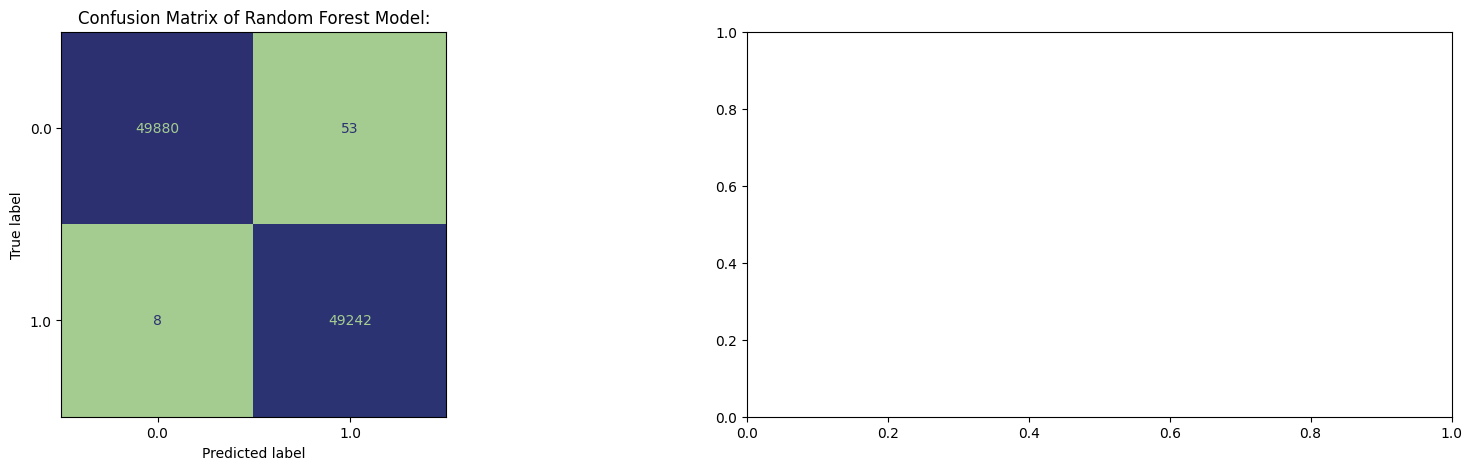

In [81]:
y_pred = model_XGB.predict(x_test)
confusion_xgb = confusion_matrix(y_test,y_pred)
print("Báo cáo phân loại : \n", classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn  \n", confusion_xgb)
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Feed Forward Neural Network

In [83]:
# Build the model
model_FFNN = Sequential()

# Add the input layer and the first hidden layer
model_FFNN.add(Dense(units=64, activation='relu', input_dim=7))

# Add another hidden layer
model_FFNN.add(Dense(units=32, activation='relu'))

# Add the output layer
model_FFNN.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_FFNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_FFNN.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5786/5786 [==============================] - 15s 2ms/step - loss: 0.0586 - accuracy: 0.9790 - val_loss: 0.0358 - val_accuracy: 0.9860
Epoch 2/10
5786/5786 [==============================] - 14s 2ms/step - loss: 0.0301 - accuracy: 0.9893 - val_loss: 0.0306 - val_accuracy: 0.9897
Epoch 3/10
5786/5786 [==============================] - 13s 2ms/step - loss: 0.0259 - accuracy: 0.9909 - val_loss: 0.0277 - val_accuracy: 0.9897
Epoch 4/10
5786/5786 [==============================] - 16s 3ms/step - loss: 0.0233 - accuracy: 0.9917 - val_loss: 0.0223 - val_accuracy: 0.9917
Epoch 5/10
5786/5786 [==============================] - 14s 2ms/step - loss: 0.0212 - accuracy: 0.9923 - val_loss: 0.0211 - val_accuracy: 0.9922
Epoch 6/10
5786/5786 [==============================] - 14s 2ms/step - loss: 0.0195 - accuracy: 0.9930 - val_loss: 0.0187 - val_accuracy: 0.9947
Epoch 7/10
5786/5786 [==============================] - 14s 2ms/step - loss: 0.0182 - accuracy: 0.9935 - val_loss: 0.0155 - val_ac

In [84]:
# Đánh giá mô hình trên tập kiểm thử
loss, accuracy = model_FFNN.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Dự đoán và đánh giá precision, recall, và f1-score

y_pred = model_FFNN.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)


3100/3100 [==============================] - 5s 2ms/step - loss: 0.0146 - accuracy: 0.9944
Test Loss: 0.0146
Test Accuracy: 0.9944
3100/3100 [==============================] - 4s 1ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     49933
         1.0       1.00      0.99      0.99     49250

    accuracy                           0.99     99183
   macro avg       0.99      0.99      0.99     99183
weighted avg       0.99      0.99      0.99     99183


Confusion Matrix:
[[49712   221]
 [  337 48913]]


<Axes: >

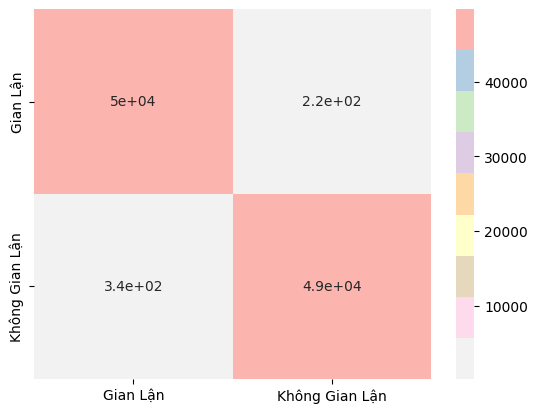

In [85]:
sns.heatmap(conf_matrix, annot=True, cmap='Pastel1_r', xticklabels=['Gian Lận' ,'Không Gian Lận'],yticklabels=['Gian Lận' ,'Không Gian Lận'])

# Recurrent Neural Network

In [86]:
x_train.shape

(231427, 7)

In [87]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Input, Dropout
from keras import backend as K, regularizers, Model, metrics

In [88]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_LSTM_X=x_train
val_LSTM_X=x_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

## Recuperation des labels
train_LSTM_y=y_train
val_LSTM_y=y_test

In [89]:
inputs = Input((1, 7))
x1 = LSTM(50, dropout=0.3, recurrent_dropout=0.2, return_sequences=True)(inputs)
x2 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(x1)
outputs = Dense(1, activation='sigmoid')(x2)
model = Model(inputs, outputs)


In [90]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
history=model.fit(train_LSTM_X, train_LSTM_y,epochs=10,batch_size=32, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/10
7233/7233 [==============================] - 55s 7ms/step - loss: 0.1948 - accuracy: 0.9192 - val_loss: 0.0905 - val_accuracy: 0.9650
Epoch 2/10
7233/7233 [==============================] - 48s 7ms/step - loss: 0.1416 - accuracy: 0.9428 - val_loss: 0.0713 - val_accuracy: 0.9744
Epoch 3/10
7233/7233 [==============================] - 49s 7ms/step - loss: 0.1235 - accuracy: 0.9509 - val_loss: 0.0695 - val_accuracy: 0.9741
Epoch 4/10
7233/7233 [==============================] - 58s 8ms/step - loss: 0.1135 - accuracy: 0.9553 - val_loss: 0.0721 - val_accuracy: 0.9692
Epoch 5/10
7233/7233 [==============================] - 55s 8ms/step - loss: 0.1069 - accuracy: 0.9580 - val_loss: 0.0841 - val_accuracy: 0.9551
Epoch 6/10
7233/7233 [==============================] - 49s 7ms/step - loss: 0.1003 - accuracy: 0.9602 - val_loss: 0.1078 - val_accuracy: 0.9480
Epoch 7/10
7233/7233 [==============================] - 54s 8ms/step - loss: 0.0957 - accuracy: 0.9624 - val_loss: 0.1303 - val_ac

# OVERFITTING

## Using StratifiedKFold for cross-validation.

In [92]:
# Data preprocessing

dataTemp_ = data.copy()
dataTemp_['type'] = dataTemp_['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})
dataTemp_.drop('isFlaggedFraud', axis=1, inplace=True)
dataTemp_.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,rất thấp,rất thấp,rất thấp
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,rất thấp,rất thấp,rất thấp
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,rất thấp,rất thấp,rất thấp
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,rất thấp,rất thấp,rất thấp
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,rất thấp,rất thấp,rất thấp


In [94]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score

seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
X = dataTemp.drop([],axis=1)

X = dataTemp_.copy()
X.drop(['nameOrig', 'nameDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train_, y_train_ = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [95]:
X_train_

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.280575,-1.049116,-0.430594,-0.306947,-0.316097,-0.387495,-0.440828
1,0.226677,-1.049116,-0.536605,-0.057469,-0.062731,-0.387495,-0.440828
2,-3.324083,0.312968,-0.526531,-0.311560,-0.314713,-0.382726,-0.434528
3,-4.338585,-0.368074,-0.427024,1.248786,1.239608,-0.286575,-0.365068
4,1.241179,0.994010,-0.324370,0.247520,0.213529,2.663113,2.448672
...,...,...,...,...,...,...,...
209,1.241179,0.994010,-0.479077,-0.307348,-0.316097,-0.387495,-0.433626
210,1.241179,1.675052,11.329078,1.089738,-0.316097,-0.387495,-0.440828
211,1.241179,0.994010,11.329078,1.089738,-0.316097,0.411300,1.708580
212,1.241179,1.675052,2.580758,0.054678,-0.316097,-0.387495,-0.440828


In [96]:
y_train_

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
209    1.0
210    1.0
211    1.0
212    1.0
213    1.0
Name: isFraud, Length: 214, dtype: float64

In [97]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))

        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

        print('\n')

In [98]:
from sklearn.neural_network import MLPClassifier
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(class_weight='balanced', random_state=seed),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed),
    'Decision Tree Classifier': DecisionTreeClassifier(class_weight='balanced', random_state=seed),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Feed Forward Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32),
                                                activation='relu',
                                                solver='adam',
                                                max_iter=1000,
                                                random_state=seed)
}

In [99]:
model_comparison_evaluate(classifiers, X_train_, y_train_)

K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.925 (0.023)
Mean precision score: 0.911 (0.036)
Mean recall score: 0.944 (0.020)
Mean f1 score: 0.927 (0.022)
Mean roc_auc score: 0.987 (0.008)


Logistic Regression:
Mean accuracy score: 0.888 (0.054)
Mean precision score: 0.868 (0.079)
Mean recall score: 0.925 (0.039)
Mean f1 score: 0.893 (0.048)
Mean roc_auc score: 0.955 (0.030)


Decision Tree Classifier:
Mean accuracy score: 0.907 (0.033)
Mean precision score: 0.909 (0.053)
Mean recall score: 0.907 (0.041)
Mean f1 score: 0.907 (0.033)
Mean roc_auc score: 0.907 (0.032)


K-Nearest Neighbors:
Mean accuracy score: 0.851 (0.040)
Mean precision score: 0.834 (0.047)
Mean recall score: 0.877 (0.066)
Mean f1 score: 0.854 (0.044)
Mean roc_auc score: 0.952 (0.017)


Feed Forward Neural Network:
Mean accuracy score: 0.888 (0.027)
Mean precision score: 0.886 (0.047)
Mean recall score: 0.897 (0.055)
Mean f1 score: 0.889 (0.025)
Mean roc_auc score: 0.963 (0.003)




# OVERFITTING FNN
Thêm Dropout Layers:
Thêm các lớp Dropout giữa các lớp ẩn để ngẫu nhiên loại bỏ một số đơn vị ẩn trong quá trình huấn luyện. Điều này có thể giúp giảm overfitting.
model_FFNN.add(Dropout(0.5)) sau mỗi lớp ẩn, với tỷ lệ dropout là 0.5 hoặc giá trị khác.

In [100]:
# Build the model with Dropout
model_FFNN_dropout = Sequential()

# Add the input layer and the first hidden layer
model_FFNN_dropout.add(Dense(units=64, activation='relu', input_dim=7))
model_FFNN_dropout.add(Dropout(0.5))  # Adding Dropout layer

# Add another hidden layer
model_FFNN_dropout.add(Dense(units=32, activation='relu'))
model_FFNN_dropout.add(Dropout(0.5))  # Adding Dropout layer

# Add the output layer
model_FFNN_dropout.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_FFNN_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_FFNN_dropout.fit(X_train_, y_train_, epochs=20, batch_size=16, validation_split=0.2)


Epoch 1/20
11/11 [==============================] - 1s 25ms/step - loss: 0.6936 - accuracy: 0.5556 - val_loss: 0.6853 - val_accuracy: 0.5814
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 0.6542 - accuracy: 0.7018 - val_loss: 0.6808 - val_accuracy: 0.5349
Epoch 3/20
11/11 [==============================] - 0s 6ms/step - loss: 0.5954 - accuracy: 0.7602 - val_loss: 0.6989 - val_accuracy: 0.5349
Epoch 4/20
11/11 [==============================] - 0s 5ms/step - loss: 0.5067 - accuracy: 0.8246 - val_loss: 0.7178 - val_accuracy: 0.4884
Epoch 5/20
11/11 [==============================] - 0s 5ms/step - loss: 0.5214 - accuracy: 0.7719 - val_loss: 0.7519 - val_accuracy: 0.4884
Epoch 6/20
11/11 [==============================] - 0s 6ms/step - loss: 0.4462 - accuracy: 0.8596 - val_loss: 0.7959 - val_accuracy: 0.4651
Epoch 7/20
11/11 [==============================] - 0s 5ms/step - loss: 0.4220 - accuracy: 0.8655 - val_loss: 0.8444 - val_accuracy: 0.3721
Epoch 8/20
11/11 [=

 ## thêm dropout layer và regularization vào mô hình neural network để tránh overfitting, sử dụng thư viện Keras trong TensorFlow.
 ##### X_train_, y_train_ là dữ liệu sau khi áp dụng RandomUnderSampler

In [ ]:
!pip install --upgrade tensorflow


In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Tạo mô hình Sequential
model = Sequential()

# Thêm layer đầu tiên với regularization L2 và dropout
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))  # Thêm dropout layer với tỷ lệ dropout là 0.5

# Thêm layer thứ hai với regularization L2 và dropout
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))  # Thêm dropout layer với tỷ lệ dropout là 0.5

# Thêm layer đầu ra với activation sigmoid
model.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# In thông tin tóm tắt của mô hình
model.summary()

# Huấn luyện mô hình X_train_, y_train_ là dữ liệu sau khi áp dụng RandomUnderSampler
history = model.fit(X_train_, y_train_, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                512       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2625 (10.25 KB)
Trainable params: 2625 (10.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
7/7 [====

# CẢI THIỆN MÔ HÌNH


## - Kiểm tra lại các hyperparameters như learning rate, số lượng epochs, kích thước batch, và các hyperparameters khác để xem liệu có thể tối ưu hóa chúng để cải thiện hiệu suất không.thử nghiệm nhiều giá trị khác nhau cho các hyperparameters và chọn những giá trị làm cho mô hình hoạt động tốt nhất trên tập validation hoặc test.

##

# Best hyperparameters using RandomizedSearchCV

## Logicstic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter grid for Logistic Regression
param_dist_logistic = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2']
}

# Create a Logistic Regression model
logistic = LogisticRegression()

# Create RandomizedSearchCV object
random_search_logistic = RandomizedSearchCV(
    logistic,
    param_distributions=param_dist_logistic,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search_logistic.fit(x_train_SS, y_train_SS)

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:", random_search_logistic.best_params_)
best_logistic = random_search_logistic.best_estimator_

# Predict on the test set
y_pred_logistic = best_logistic.predict(X_test)

# Print the confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logistic)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Hyperparameters for Logistic Regression: {'C': 2.832290311184182, 'penalty': 'l2'}
Confusion Matrix for Logistic Regression:
[[24162  8899]
 [    8    18]]

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84     33061
         1.0       0.00      0.69      0.00        26

    accuracy                           0.73     33087
   macro avg       0.50      0.71      0.42     33087
weighted avg       1.00      0.73      0.84     33087



# Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid for Decision Tree
param_dist_dt = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Create RandomizedSearchCV object
random_search_dt = RandomizedSearchCV(
    dt,
    param_distributions=param_dist_dt,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search_dt.fit(x_train_SS, y_train_SS)

# Print the best hyperparameters
print("Best Hyperparameters for DecisionTreeClassifier:", random_search_dt.best_params_)
# Using the best DecisionTreeClassifier model from RandomizedSearchCV
best_dt = random_search_dt.best_estimator_

# Predict on the test set
y_pred_dt = best_dt.predict(X_test)

# Print the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix for DecisionTreeClassifier:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Best Hyperparameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 17}

Confusion Matrix for DecisionTreeClassifier:
[[17856 15205]
 [   13    13]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70     33061
         1.0       0.00      0.50      0.00        26

    accuracy                           0.54     33087
   macro avg       0.50      0.52      0.35     33087
weighted avg       1.00      0.54      0.70     33087



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# improve ensemble learning model

## RandomForestClassifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid for RandomForestClassifier
param_dist_rf = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create a RandomForestClassifier model
rf = RandomForestClassifier()

# Create RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search_rf.fit(x_train_SS, y_train_SS)

# Print the best hyperparameters
print("Best Hyperparameters for RandomForestClassifier:", random_search_rf.best_params_)
best_rf = random_search_rf.best_estimator_

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Print the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for RandomForestClassifier:")
print(conf_matrix_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Hyperparameters for RandomForestClassifier: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 14, 'min_samples_split': 19, 'n_estimators': 18}

Confusion Matrix for RandomForestClassifier:
[[14204 18857]
 [   12    14]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60     33061
         1.0       0.00      0.54      0.00        26

    accuracy                           0.43     33087
   macro avg       0.50      0.48      0.30     33087
weighted avg       1.00      0.43      0.60     33087



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Modelling using Xg-Boost

In [105]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

# Define the hyperparameter grid for XGBoost
param_dist_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2, 3]
}

# Create an XGBoost model
xgb_model = xgb.XGBClassifier()

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search_xgb.fit(x_train_SS, y_train_SS)

# Print the best hyperparameters for XGBoost
print("Best Hyperparameters for XGBoost:", random_search_xgb.best_params_)

# Using the best XGBoost model from RandomizedSearchCV
best_xgb_model = random_search_xgb.best_estimator_

# Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Print the confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix for XGBoost:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Best Hyperparameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}

Confusion Matrix for XGBoost:
[[10645 22416]
 [    2    24]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60     33061
         1.0       0.00      0.54      0.00        26

    accuracy                           0.43     33087
   macro avg       0.50      0.48      0.30     33087
weighted avg       1.00      0.43      0.60     33087



# ĐÁNH GIÁ LẠI MÔ HÌNH

In [106]:
def plot_confusion_matrices(conf_matrix_1, conf_matrix_2, title1, title2):
    # Vẽ hai confusion matrix
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Class 0', 'Class 1', 'Class 2'],
                yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.title(title1)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.subplot(1, 2, 2)
    sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Class 0', 'Class 1', 'Class 2'],
                yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.title(title2)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.tight_layout()
    plt.show()

    # Tính toán sự khác biệt giữa hai confusion matrix
    diff_matrix = conf_matrix_2 - conf_matrix_1

    # Vẽ heatmap cho sự khác biệt
    plt.figure(figsize=(6, 6))
    sns.heatmap(diff_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=True,
                xticklabels=['Class 0', 'Class 1', 'Class 2'],
                yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.title('Difference between ' + title2 + ' and ' + title1)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Logicstic Regression

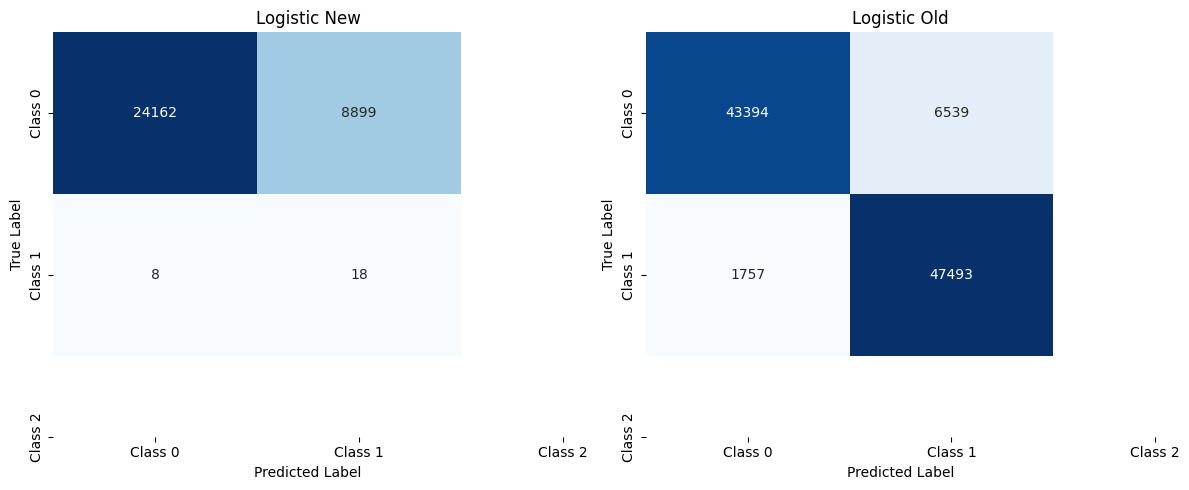

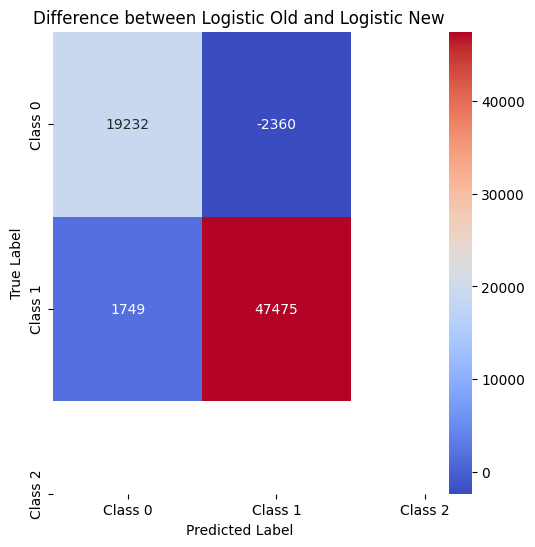

In [107]:
plot_confusion_matrices(conf_matrix_logistic, confusionMatix, title1='Logistic New', title2='Logistic Old')


## Decision Tree

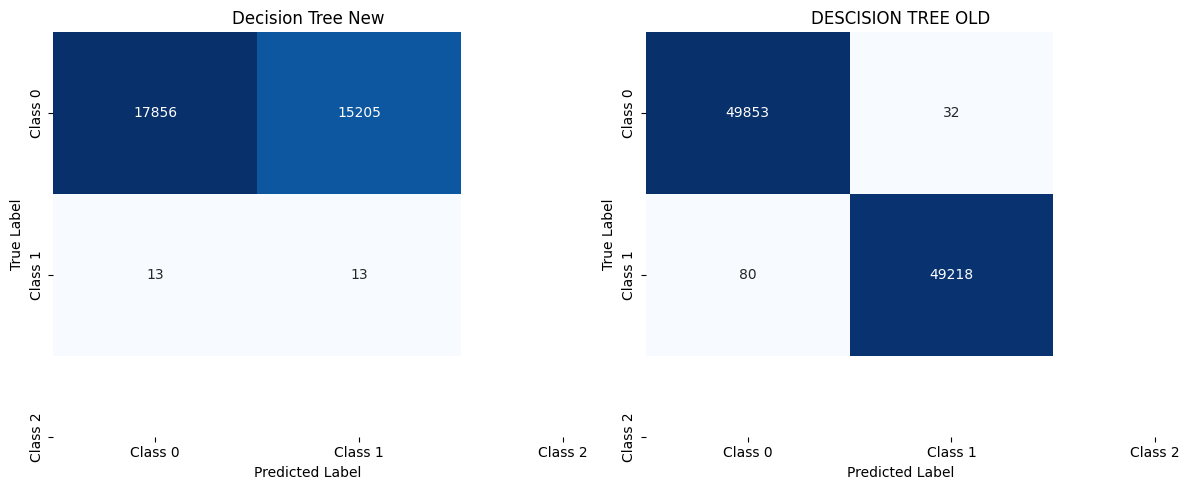

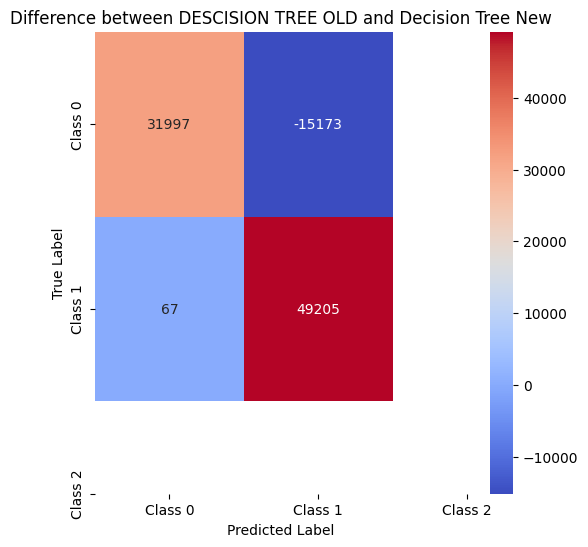

In [111]:
plot_confusion_matrices(conf_matrix_dt, dt_cm_new, title1='Decision Tree New', title2='DESCISION TREE OLD')

## RandomForestClassifier

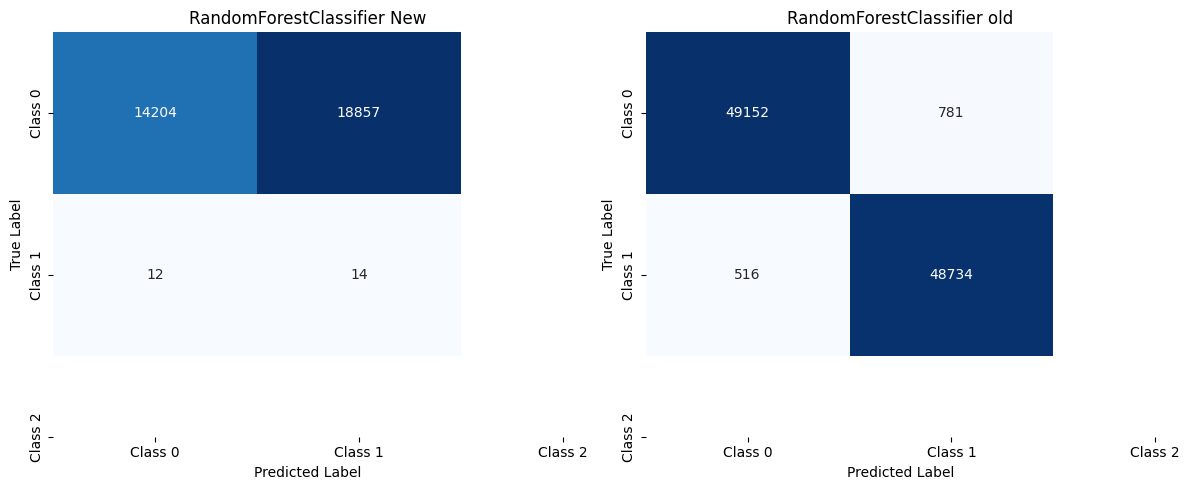

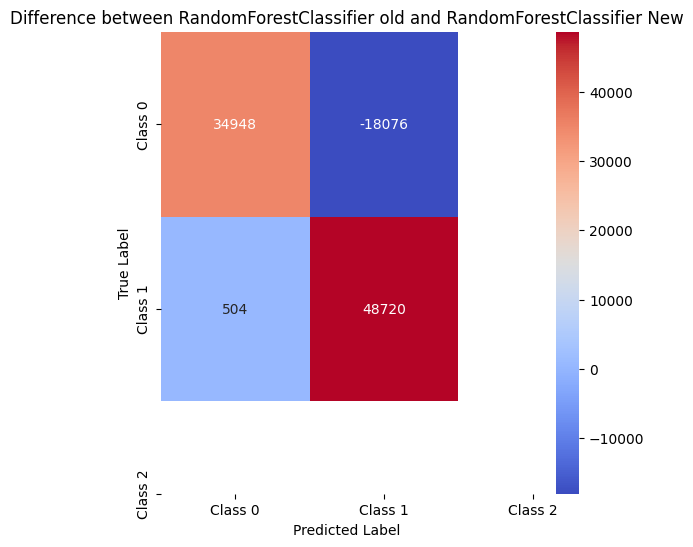

In [109]:
plot_confusion_matrices(conf_matrix_rf, confusion_randomtree, title1='RandomForestClassifier New', title2='RandomForestClassifier old')

## Modelling using Xg-Boost

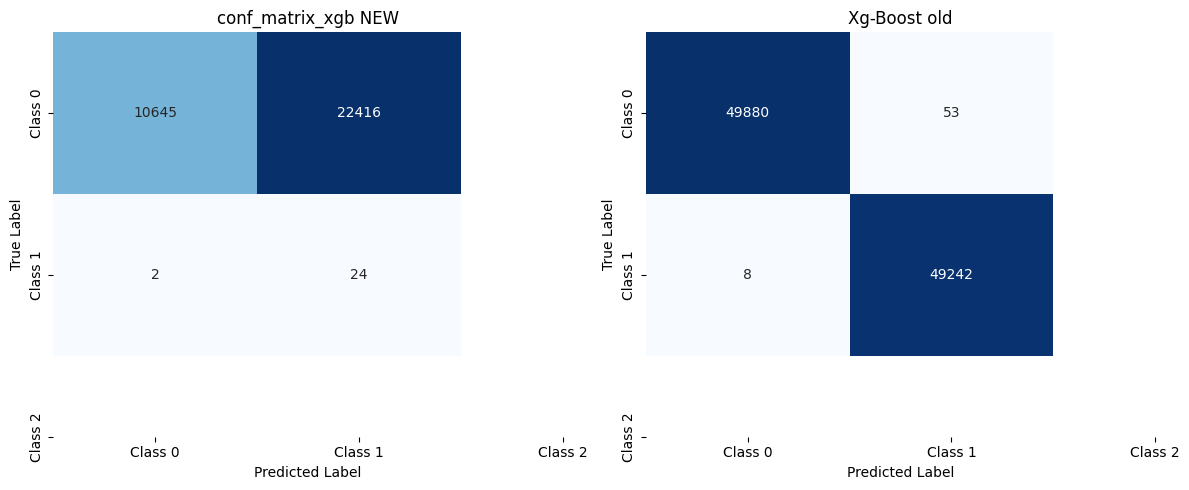

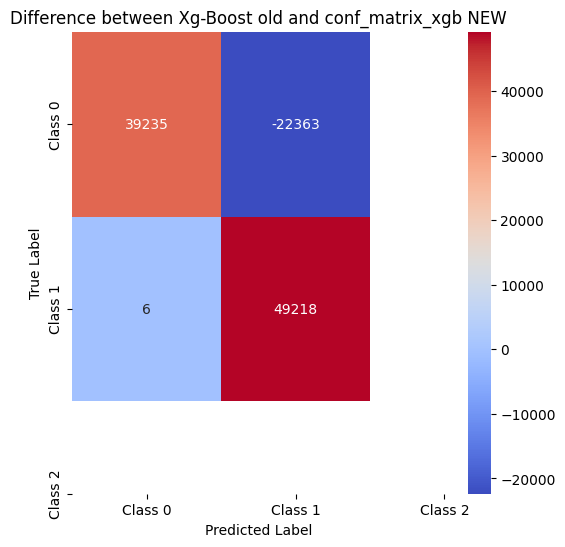

In [110]:
plot_confusion_matrices(conf_matrix_xgb, confusion_xgb, title1='conf_matrix_xgb NEW', title2='Xg-Boost old')